In [1]:
! pip install snscrape 


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 59.1/59.1 kB 119.9 kB/s eta 0:00:00


In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

In [21]:
query = """("litecoin") until:2022-12-09 since:2022-01-09"""
tweets = [] # empty dataframe to be loaded with tweeys 
limit = 100 # the limit number of tweet to be retrieved 


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date,tweet.content])
        
tweetDF = pd.DataFrame(tweets, columns=['Date','Tweet'])
tweetDF.head()


,Date,Tweet
0,2022-12-08 23:59:40+00:00,"@wicked_mule @litecoin_bull Yes, I found a vid..."
1,2022-12-08 23:59:36+00:00,Higher low set for #Litecoin what a beautiful ...
2,2022-12-08 23:59:26+00:00,Top 10 #Crypto ATH Prices (excluding stablecoi...
3,2022-12-08 23:59:22+00:00,The brave will prevail!
4,2022-12-08 23:59:13+00:00,@DiddyBopAllDay @cobailey14 @alexspeier @Bosto...


### Data Pre peparation  

In [22]:
#remove links from tweets
tweetDF['Tweet'] = tweetDF['Tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'https\S+', '', regex=True)
# remove special charattes 
tweetDF['Tweet']=tweetDF['Tweet'].str.replace('[^\w\s]', '')
# convert characters to lower case 
tweetDF['Tweet']=tweetDF['Tweet'].str.lower()
#Remove rt which stands for retweet 
tweetDF['Tweet']= tweetDF['Tweet'].replace('rt', '', regex=True)
# Remove non english charatcters 
tweetDF=tweetDF[tweetDF['Tweet'].map(lambda x: x.isascii())]

C:\Users\BIDA19-025\AppData\Local\Temp\ipykernel_27596\3321336452.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [23]:
tweetDF.head()

,Date,Tweet
0,2022-12-08 23:59:40+00:00,wicked_mule litecoin_bull yes i found a video ...
1,2022-12-08 23:59:36+00:00,higher low set for litecoin what a beautiful s...
3,2022-12-08 23:59:22+00:00,the brave will prevail
4,2022-12-08 23:59:13+00:00,diddybopallday cobailey14 alexspeier bostonglo...
5,2022-12-08 23:57:45+00:00,litecoin_bull i was like tell me more kind str...


In [24]:
text = tweetDF['Tweet']

In [25]:
text.head()

0    wicked_mule litecoin_bull yes i found a video ...
1    higher low set for litecoin what a beautiful s...
3                               the brave will prevail
4    diddybopallday cobailey14 alexspeier bostonglo...
5    litecoin_bull i was like tell me more kind str...
Name: Tweet, dtype: object

In [26]:
# importing the saved model and vectorizer
import pickle
vec1 = pickle.load(open("vector.pickel", "rb"))
model2 = pickle.load( open('model2.pkl','rb'))


In [27]:
# model functionality test
test_text = vec1.transform(['Bitcoin is a bad investment'])

In [28]:
model2.predict(test_text)

array([-1], dtype=int64)

In [29]:
# vectorize the text series 
text = vec1.transform(text)

In [30]:
# loaded model performing sentintment classification of dataframe
textSenti = model2.predict(text)

In [31]:
textSenti

array([ 1,  1,  1,  1, -1, -1, -1, -1,  1,  0,  0,  1, -1,  0, -1, -1,  0,
        1,  0,  0,  1,  0,  1,  0, -1,  0,  0,  0,  1,  1,  0, -1,  0,  0,
       -1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1,  1,  1,  0, -1, -1, -1,
       -1,  0,  0,  1,  1, -1,  0, -1,  0,  0,  0,  0,  0,  1, -1, -1,  1,
        0,  1,  1, -1,  1, -1,  0,  1,  1,  0,  1, -1,  0,  1,  0, -1,  0,
       -1, -1,  0,  0, -1,  1, -1,  0, -1, -1,  0,  1], dtype=int64)

In [32]:
#appending list to dataframe
tweetDF['Sentiment'] = textSenti.tolist()

In [33]:
tweetDF.head()

,Date,Tweet,Sentiment
0,2022-12-08 23:59:40+00:00,wicked_mule litecoin_bull yes i found a video ...,1
1,2022-12-08 23:59:36+00:00,higher low set for litecoin what a beautiful s...,1
3,2022-12-08 23:59:22+00:00,the brave will prevail,1
4,2022-12-08 23:59:13+00:00,diddybopallday cobailey14 alexspeier bostonglo...,1
5,2022-12-08 23:57:45+00:00,litecoin_bull i was like tell me more kind str...,-1


In [34]:
#properly naming the sentiments with words 
tweetDF['Sentiment'] = tweetDF['Sentiment'].replace( [1, 0, -1] ,["Positive", "Neutral", "Negative"] )
tweetDF.head(15) 

,Date,Tweet,Sentiment
0,2022-12-08 23:59:40+00:00,wicked_mule litecoin_bull yes i found a video ...,Positive
1,2022-12-08 23:59:36+00:00,higher low set for litecoin what a beautiful s...,Positive
3,2022-12-08 23:59:22+00:00,the brave will prevail,Positive
4,2022-12-08 23:59:13+00:00,diddybopallday cobailey14 alexspeier bostonglo...,Positive
5,2022-12-08 23:57:45+00:00,litecoin_bull i was like tell me more kind str...,Negative
6,2022-12-08 23:57:36+00:00,never forget who the people were that were cal...,Negative
7,2022-12-08 23:56:48+00:00,even when we first come on twitter \n\nwe warn...,Negative
8,2022-12-08 23:56:42+00:00,masterbtcltc paypal litecoin should be nothing...,Negative
9,2022-12-08 23:56:28+00:00,the litecoin bull run is fun right now,Positive
10,2022-12-08 23:55:07+00:00,unhappyhammer68 jomashop litecoin bitpay elonm...,Neutral


In [35]:
# pie chart of sentiment
tweetDF['Sentiment'].value_counts()
pieSenti = px.pie(tweetDF, names='Sentiment', title ='Cryptocurrencies Sentiment Breakdown')
pieSenti.show()

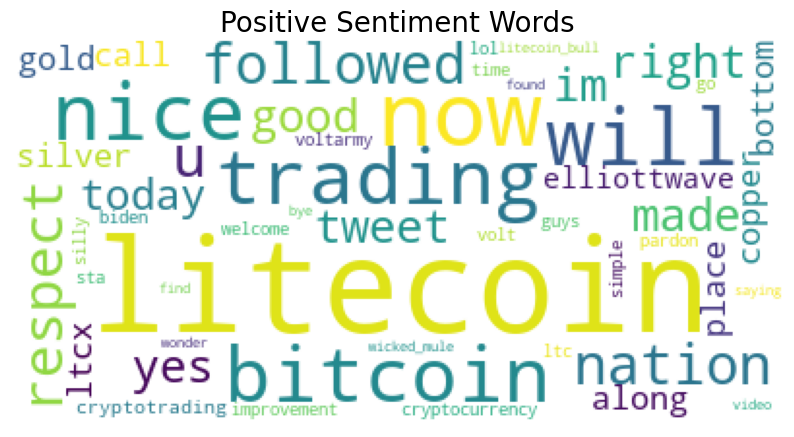

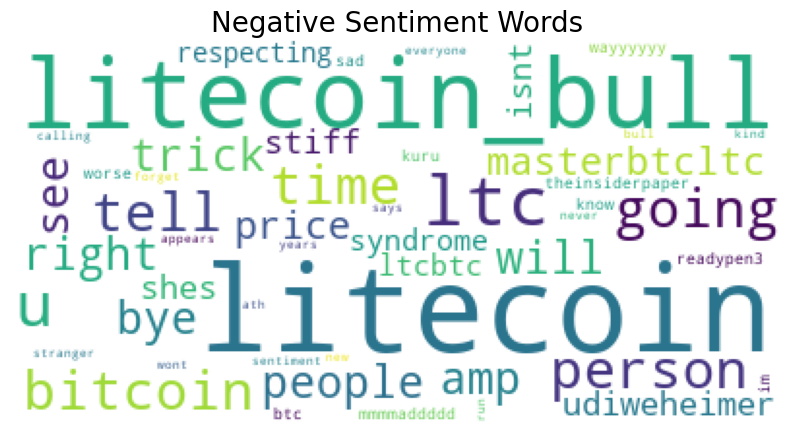

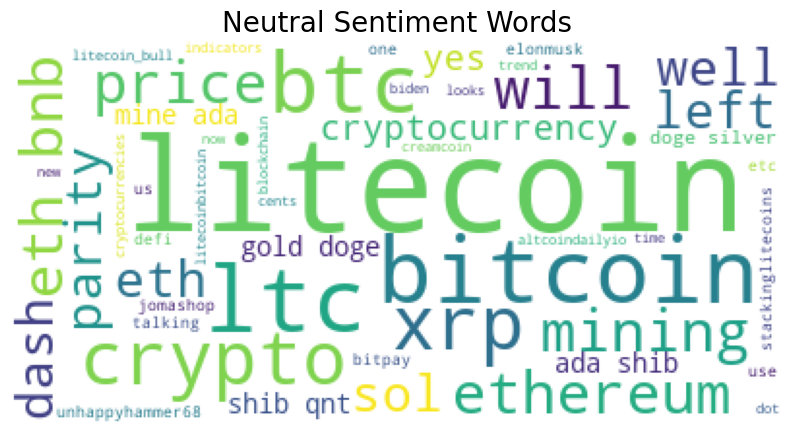

In [36]:
#word plot function
def wordfreq(df, Sentiment):
    combined_tweets = " ".join([tweet for tweet in tweetDF[tweetDF.Sentiment==Sentiment]['Tweet']])
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS) 
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(Sentiment), fontsize=20)
    plt.axis('off')
    plt.show()
# Sentiment word Plots 
wordfreq(tweetDF, 'Positive')
wordfreq(tweetDF, 'Negative')
wordfreq(tweetDF, 'Neutral')